In [1]:
import math 
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy
from scipy.io import wavfile
import pywt
from scipy.fftpack import fft,ifft,dct,idct

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
fs,dat = wavfile.read('audio.wav')

n=math.log(len(dat))/math.log(2)
num_of_samples=2**(int(n))

data=[]

for i in range(num_of_samples):
    data.append(dat[i])

In [3]:
num_of_zeros=[]
for i in range(int(num_of_samples/10000)):
    num_of_zeros.append(i*10000)

In [4]:
cosine_transform=dct(data,norm='ortho')

In [5]:
def cosine_transform_error(revert_cos_seq):
    
    revert_cos_seq=np.array(revert_cos_seq)
    
    err_dct=0
    
    for i in range(num_of_samples):
        err_dct=err_dct+((data[i]-revert_cos_seq[i])**2)
    
    err_dct=err_dct/num_of_samples
    return err_dct
        

In [6]:
def compressed_cos_transform(zero):
    
    file=open('compressed_cosine_transform'+str(zero)+'.txt','w')
    
    for i in range(num_of_samples-zero):
        file.write(str(cosine_transform[i]))
        file.write(' ')
                   
    file.close()

In [7]:
def uncompress_cos_tranform(zero):
    file=open('compressed_cosine_transform'+str(zero)+'.txt','r')
    
    uncomp_cos_tran=[]
    
    for word in file:
        for value in word.split():
            uncomp_cos_tran.append(float(value))
    
    for i in range(zero):
        uncomp_cos_tran.append(0)
    
    revert_cos_seq=idct(uncomp_cos_tran,norm='ortho')
    scipy.io.wavfile.write(('reverted_cosine'+str(zeros)+'.wav'),fs,revert_cos_seq/num_of_samples)
    return revert_cos_seq
        
        

In [8]:
E_DCT=[]
for zeros in num_of_zeros:    
    
    compressed_cos_transform(zeros)
    
    reverted_cos_seq=uncompress_cos_tranform(zeros)
        
    error=cosine_transform_error(reverted_cos_seq)
    
    E_DCT.append(error)    

In [9]:
hr_transform=pywt.dwt(data,'haar')

In [10]:
def haar_transform_error(revert_hr_seq):
    
    revert_hr_seq=np.array(revert_hr_seq)
    
    err_hr=0
    
    for i in range(num_of_samples):
        err_hr=err_hr+((data[i]-revert_hr_seq[i])**2)
    
    err_hr=err_hr/num_of_samples
    return err_hr
        

In [11]:
def compressed_hr_transform(zero):
    seq1=list(hr_transform[0])
    seq2=list(hr_transform[1])
    seq=seq1+seq2
        
    file=open('compressed_haar_transform'+str(zero)+'.txt','w')
    
    for i in range(num_of_samples-zero):
        file.write(str(seq[i]))
        file.write(' ')
                   
    file.close()

In [12]:
def uncompress_hr_tranform(zero):
    file=open('compressed_haar_transform'+str(zero)+'.txt','r')
    
    uncomp_hr_tran=[]
    
    for word in file:
        for value in word.split():
            uncomp_hr_tran.append(float(value))
    
    for i in range(zero):
        uncomp_hr_tran.append(0)
        
    seq1=[]
    seq2=[]
    
    for i in range(int(num_of_samples/2)):
        seq1.append(uncomp_hr_tran[i])
        seq2.append(uncomp_hr_tran[int(num_of_samples/2)+i])
    
    revert_hr_seq=pywt.idwt(seq1,seq2,'haar')
    scipy.io.wavfile.write(('reverted_haar'+str(zeros)+'.wav'),fs,revert_hr_seq/num_of_samples)

    return revert_hr_seq
        
        

In [13]:
E_haar=[]
for zeros in num_of_zeros:    
    
    compressed_hr_transform(zeros)
    
    reverted_hr_seq=uncompress_hr_tranform(zeros)
        
    error=haar_transform_error(reverted_hr_seq)
    
    E_haar.append(error)    

In [14]:
fourier_transform=fft(data)

In [15]:
def fourier_transform_error(revert_fou_seq):
    
    revert_fou_seq=np.array(revert_fou_seq)
    
    err_fou=0
    
    for i in range(num_of_samples):
        err_fou=err_fou+((data[i]-revert_fou_seq[i])**2)
    
    err_fou=err_fou/num_of_samples
    return err_fou
        

In [16]:
def compressed_fou_transform(zero):
    
    file=open('compressed_fourier_transform'+str(zero)+'.txt','w')
    
    comp_fou_tran=[]
    
    for i in range(int(num_of_samples/2)-int(zero/2) ):
        comp_fou_tran.append(fourier_transform[i])
        
    for i in range(int(num_of_samples/2)+int(zero/2),num_of_samples):
        comp_fou_tran.append(fourier_transform[i])
        
    for i in range(num_of_samples-zero):
        file.write(str(comp_fou_tran[i]))
        file.write(' ')
                   
    file.close()

In [17]:
def uncompress_fou_tranform(zero):
    file=open('compressed_fourier_transform'+str(zero)+'.txt','r')
    
    uncomp_fou_tran=[]
    
    for word in file:
        for value in word.split():
            uncomp_fou_tran.append(complex(value))
    
    inv_fou=[]
    for i in range(int(num_of_samples/2)-int(zero/2)):
        inv_fou.append(uncomp_fou_tran[i])
        
    for i in range(zero):
        inv_fou.append(0)
        
    for i in range(int(num_of_samples/2)+int(zero/2),num_of_samples):
        inv_fou.append(uncomp_fou_tran[i-zero])    
    
    
    revert_fou_seq=np.real(ifft(inv_fou))
    scipy.io.wavfile.write(('reverted_fourier'+str(zeros)+'.wav'),fs,revert_fou_seq/num_of_samples)

    return revert_fou_seq
        
        

In [18]:
E_fou=[]
for zeros in num_of_zeros:    
    
    compressed_fou_transform(zeros)
    
    reverted_fou_seq=uncompress_fou_tranform(zeros)
        
    error=fourier_transform_error(reverted_fou_seq)
    
    E_fou.append(error)    

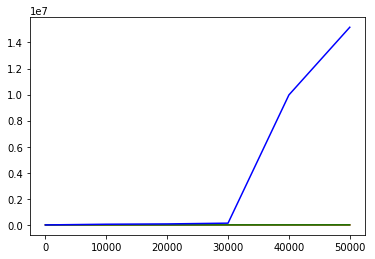

In [19]:
plt.plot(num_of_zeros,E_DCT,'r')
plt.plot(num_of_zeros,E_fou,'g')
plt.plot(num_of_zeros,E_haar,'b')